In [1]:
from RogerSatchell import rogers_satchell_volatility
from Parkinson import Parkinson
from GarmanKlass import garman_klass__estimator
import YangZhang as yz 
from Closetoclose import close_to_close
import numpy as np
import pandas as pd
import yfinance as yf

# Download data
data = yf.download('SPY', start='2000-01-01', end='2014-01-01')

# Set the value k
k = 1 

# Calculate volatility estimations and ensure they are in Series format
A = pd.Series(close_to_close(data))
B = pd.Series(garman_klass__estimator(data))
C = pd.Series(Parkinson(data) if isinstance(Parkinson(data), pd.Series) else Parkinson(data)['column_name'])  # Update 'column_name' as needed
D = pd.Series(rogers_satchell_volatility(data))
E = pd.Series(yz.calculate_yang_zhang(data, k))

# List of the 5 estimators (now all are definitely pandas Series)
estimators = [A, B, C, D, E]

# Computing the correlation matrix
correlation_matrix = np.zeros((5, 5))
for i in range(len(estimators)):
    for j in range(len(estimators)):
        correlation_matrix[i, j] = estimators[i].corr(estimators[j])

# Define labels for readability
labels = ['Close to Close', 'Garman Klass', 'Parkinson', 'Roger Satchell', 'Yang Zhang']
df_correlation = pd.DataFrame(correlation_matrix, index=labels, columns=labels)

# Print the correlation matrix
print(df_correlation)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/Users/hugo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


                Close to Close  Garman Klass  Parkinson  Roger Satchell  \
Close to Close        1.000000      0.621091   0.731183        0.441660   
Garman Klass          0.621091      1.000000   0.967018        0.820563   
Parkinson             0.731183      0.967018   1.000000        0.728378   
Roger Satchell        0.441660      0.820563   0.728378        1.000000   
Yang Zhang            0.848369      0.695364   0.828181        0.479573   

                Yang Zhang  
Close to Close    0.848369  
Garman Klass      0.695364  
Parkinson         0.828181  
Roger Satchell    0.479573  
Yang Zhang        1.000000  


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

# Téléchargement des données pour SPY comme précédemment
data = yf.download('SPY', start='2000-01-01', end='2014-01-01')

true_volatility = data['Realized Variance (5-minute)'].rolling(window=30).std()

# Assurons que true_volatility est une série complète pour la période (sans NaN au début)
true_volatility = true_volatility.fillna(method='bfill')


[*********************100%%**********************]  1 of 1 completed


In [3]:
# Initialisation du tableau pour stocker les corrélations
correlation_with_true_vol = np.zeros(5)

# Calcul de la corrélation pour chaque estimateur avec la vraie volatilité
for i in range(len(correlation_with_true_vol)):
    correlation_with_true_vol[i] = estimators[i].corr(true_volatility)

# Création du DataFrame pour afficher les résultats
df_corr_true_vol = pd.DataFrame([correlation_with_true_vol], columns=labels)

print("Correlation with True Volatility:\n", df_corr_true_vol)


Correlation with True Volatility:
    Close to Close  Garman Klass  Parkinson  Roger Satchell  Yang Zhang
0        0.443313      0.622307   0.615934        0.552727    0.504924


In [4]:
# Calcul de la variance de la vraie volatilité pour la période considérée
true_variance = true_volatility.var()

# Initialisation du tableau pour stocker les efficiences
efficiency_vector = np.zeros(5)

# Calcul de l'efficacité de chaque estimateur par rapport à la vraie volatilité
for i in range(len(efficiency_vector)):
    efficiency_vector[i] = true_variance / estimators[i].var()

# Création du DataFrame pour afficher les résultats
df_efficiency = pd.DataFrame([efficiency_vector], columns=labels)

print("Efficiency of Estimators:\n", df_efficiency)


Efficiency of Estimators:
    Close to Close  Garman Klass     Parkinson  Roger Satchell    Yang Zhang
0    20253.973378  42809.182226  43364.971547    54721.679971  24670.783472


In [5]:
data['Date'] = data.index
data['Month'] = data['Date'].dt.to_period('M')

[*********************100%%**********************]  1 of 1 completed


/Users/hugo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


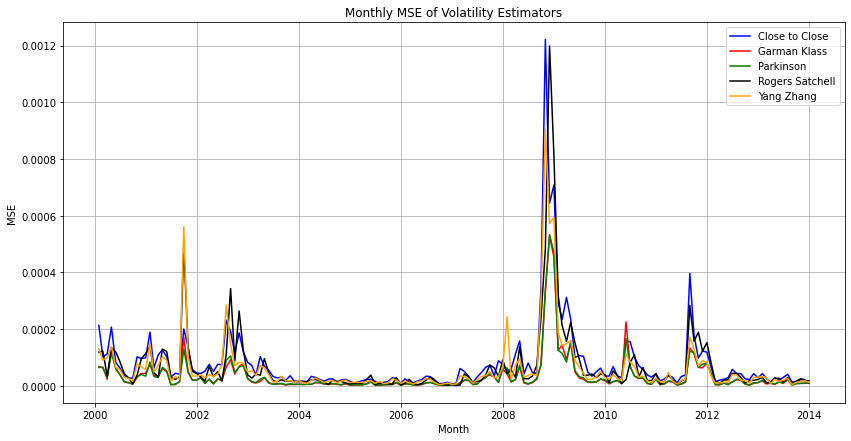

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from RogerSatchell import rogers_satchell_volatility
from Parkinson import Parkinson
from GarmanKlass import garman_klass__estimator
import YangZhang as yz
from Closetoclose import close_to_close
import numpy as np

# Télécharger les données
data = yf.download('SPY', start='2000-01-01', end='2014-01-01')

# Assurez-vous que l'index est de type DateTimeIndex
data.index = pd.to_datetime(data.index)

# Calculer les estimateurs de volatilité
data['Estimator1'] = pd.Series(close_to_close(data))
data['Estimator2'] = pd.Series(garman_klass__estimator(data))
data['Estimator3'] = pd.Series(Parkinson(data))
data['Estimator4'] = pd.Series(rogers_satchell_volatility(data))
data['Estimator5'] = pd.Series(yz.calculate_yang_zhang(data, k=1))

# Calculer la vraie volatilité mensuelle (par exemple, l'écart-type mensuel des rendements quotidiens)
data['True_Volatility'] = data['Close'].pct_change().rolling(window=30).std()
data = data.fillna(method='bfill')

# Grouper par mois et calculer la volatilité réelle mensuelle
monthly_true_volatility = data['True_Volatility'].resample('M').mean()

# Calculer le MSE mensuel pour chaque estimateur
def calculate_monthly_mse(estimateur, true_volatility):
    return ((estimateur - true_volatility) ** 2).resample('M').mean()

monthly_mse = pd.DataFrame({
    'Estimator1': calculate_monthly_mse(data['Estimator1'], data['True_Volatility']),
    'Estimator2': calculate_monthly_mse(data['Estimator2'], data['True_Volatility']),
    'Estimator3': calculate_monthly_mse(data['Estimator3'], data['True_Volatility']),
    'Estimator4': calculate_monthly_mse(data['Estimator4'], data['True_Volatility']),
    'Estimator5': calculate_monthly_mse(data['Estimator5'], data['True_Volatility'])
})

# Tracer les données
plt.figure(figsize=(14, 7))

# Ajouter une étiquette de légende explicite et définir les couleurs pour chaque estimateur
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator1'].tolist(), label='Close to Close', color='blue')
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator2'].tolist(), label='Garman Klass', color='red')
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator3'].tolist(), label='Parkinson', color='green')
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator4'].tolist(), label='Rogers Satchell', color='black')
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator5'].tolist(), label='Yang Zhang', color='orange')

plt.title('Monthly MSE of Volatility Estimators')
plt.xlabel('Month')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()


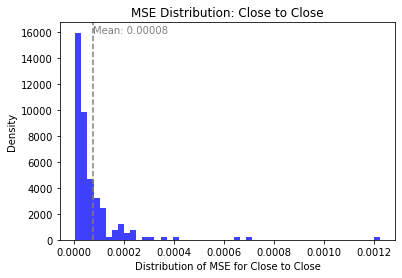

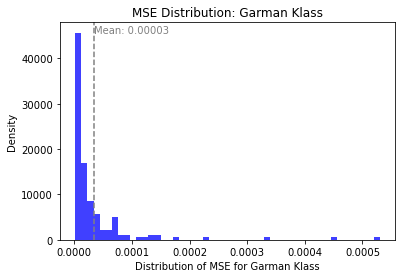

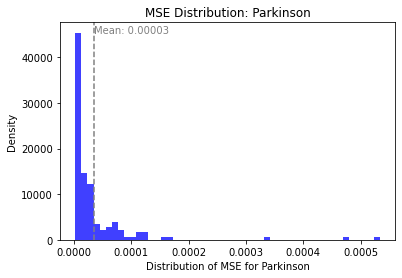

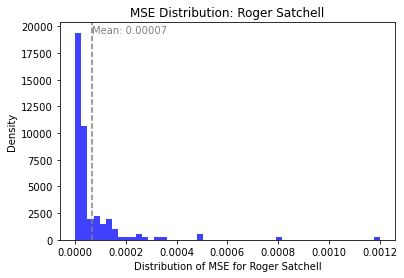

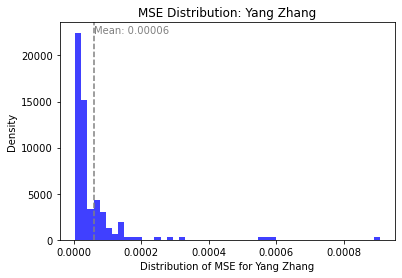

Estimators sorted from least to most biased based on MSE:
Garman Klass: 0.00003
Parkinson: 0.00003
Yang Zhang: 0.00006
Roger Satchell: 0.00007
Close to Close: 0.00008


In [7]:
import matplotlib.pyplot as plt

legends = ['Close to Close', 'Garman Klass', 'Parkinson', 'Roger Satchell', 'Yang Zhang']


mse_means = {}  

for i in range(1, 6):
    x = f'Estimator{i}'
    liste = monthly_mse[x].tolist()

    mean_mse = np.mean(liste)
    mse_means[legends[i-1]] = mean_mse  # Stocker la moyenne dans le dictionnaire avec le nom de l'estimateur correspondant
    
    density, bins, _ = plt.hist(liste, bins=50, alpha=0.75, color='blue', density=True)
    plt.xlabel(f'Distribution of MSE for {legends[i-1]}')
    plt.ylabel('Density')
    plt.axvline(x=mean_mse, color='gray', linestyle='--')
    plt.text(mean_mse, plt.ylim()[1] * 0.95, f'Mean: {mean_mse:.5f}', color='gray', ha='left')
    plt.title(f'MSE Distribution: {legends[i-1]}')
    plt.show()

sorted_means = sorted(mse_means.items(), key=lambda item: item[1])
print("Estimators sorted from least to most biased based on MSE:")
for estimator, mse in sorted_means:
    print(f"{estimator}: {mse:.5f}")


In [8]:
monthly_true_volatility = data['True_Volatility'].resample('M').mean()
data['True_Volatility'] = data['Close'].pct_change().rolling(window=30).std()

def calculate_monthly_mean(estimateur):
    return estimateur.resample('M').mean()

def calculate_monthly_bias(estimator, true_volatility):
    return (true_volatility-calculate_monthly_mean(estimator))

monthly_bias = pd.DataFrame({
    'Estimator1': calculate_monthly_bias(data['Estimator1'], data['True_Volatility']),
    'Estimator2': calculate_monthly_bias(data['Estimator2'], data['True_Volatility']),
    'Estimator3': calculate_monthly_bias(data['Estimator3'], data['True_Volatility']),
    'Estimator4': calculate_monthly_bias(data['Estimator4'], data['True_Volatility']),
    'Estimator5': calculate_monthly_bias(data['Estimator5'], data['True_Volatility'])
})

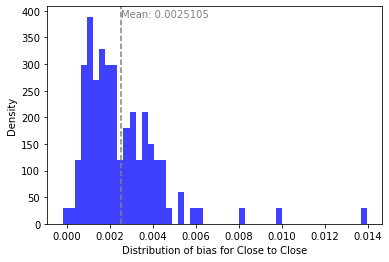

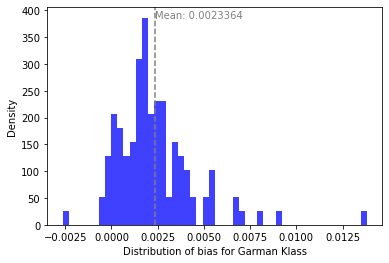

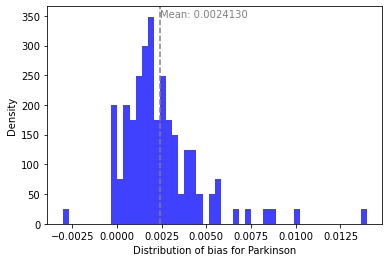

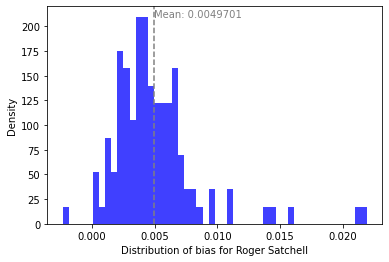

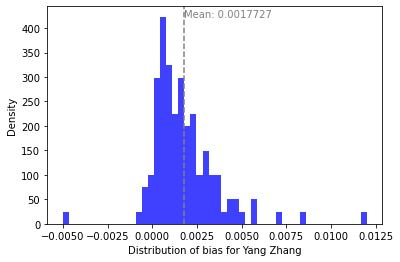

Estimators sorted from least to most biased based on MSE:
Yang Zhang: 0.0017727
Garman Klass: 0.0023364
Parkinson: 0.0024130
Close to Close: 0.0025105
Roger Satchell: 0.0049701


In [9]:
import matplotlib.pyplot as plt

bias_means = {}

for i in range (1,6):

    x = f'Estimator{i}'
    liste = monthly_bias[x].tolist()
    bias_means[legends[i-1]] = np.nanmean(liste)

    density, bins, _ = plt.hist(liste, bins=50, alpha=0.75, color='blue', density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    plt.xlabel(f'Distribution of bias for {legends[i-1]}')
    plt.ylabel('Density')
    plt.axvline(x=np.nanmean(liste),color='gray',linestyle='--')
    plt.text(np.nanmean(liste), plt.ylim()[1] * 0.95, f'Mean: {np.nanmean(liste):.7f}', color='gray', ha='left')
    plt.show()

sorted_estimators = sorted(bias_means.items(), key=lambda item: item[1])

# Affichage des estimateurs triés
print("Estimators sorted from least to most biased based on MSE:")
for estimator, bias in sorted_estimators:
    print(f"{estimator}: {bias:.7f}")

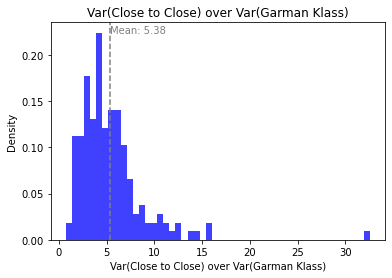

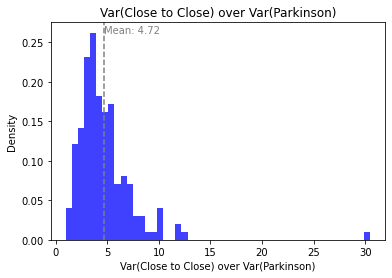

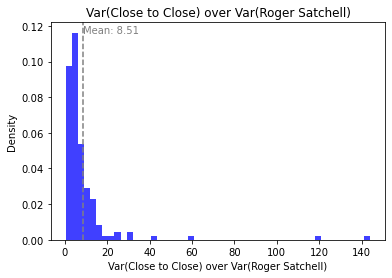

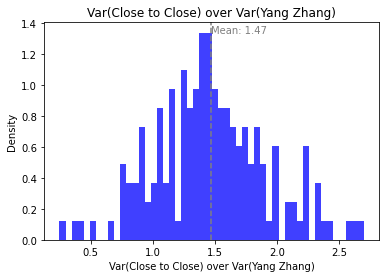

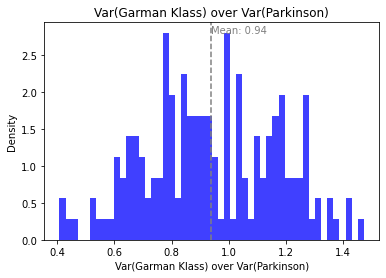

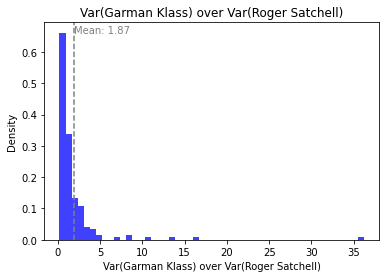

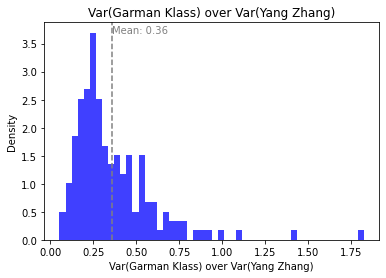

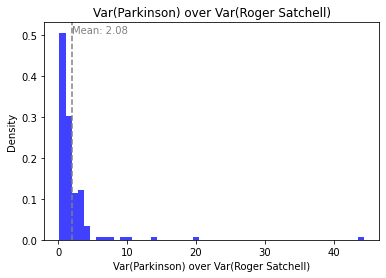

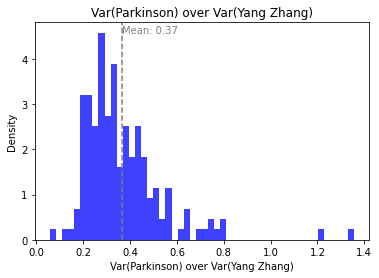

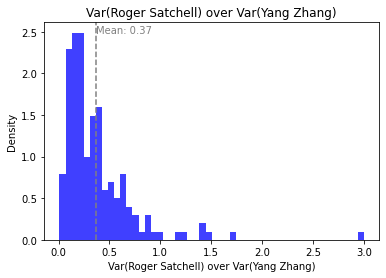

Var(Garman Klass) over Var(Yang Zhang): 0.36
Var(Parkinson) over Var(Yang Zhang): 0.37
Var(Roger Satchell) over Var(Yang Zhang): 0.37
Var(Garman Klass) over Var(Parkinson): 0.94
Var(Close to Close) over Var(Yang Zhang): 1.47
Var(Garman Klass) over Var(Roger Satchell): 1.87
Var(Parkinson) over Var(Roger Satchell): 2.08
Var(Close to Close) over Var(Parkinson): 4.72
Var(Close to Close) over Var(Garman Klass): 5.38
Var(Close to Close) over Var(Roger Satchell): 8.51


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supposons que 'data' et 'legends' sont déjà définis et contiennent les données appropriées

def calculate_monthly_var(estimator):
    return estimator.resample('M').var()

# Création d'un DataFrame avec la variance mensuelle pour chaque estimateur
monthly_var = pd.DataFrame({
    'Estimator1': calculate_monthly_var(data['Estimator1']),
    'Estimator2': calculate_monthly_var(data['Estimator2']),
    'Estimator3': calculate_monthly_var(data['Estimator3']),
    'Estimator4': calculate_monthly_var(data['Estimator4']),
    'Estimator5': calculate_monthly_var(data['Estimator5'])
})

# Fonction pour diviser les listes élément par élément
div = lambda l1, l2: [l1[k]/l2[k] for k in range(len(l1))]

# Dictionnaire pour stocker les moyennes des rapports de variance
variance_ratios_means = {}

# Boucle à travers chaque paire d'estimateurs
for i in range(1, 6):
    for j in range(i+1, 6):
        x = f'Estimator{i}'
        y = f'Estimator{j}'
        liste_x = monthly_var[x].tolist()
        liste_y = monthly_var[y].tolist()
        ratio_list = div(liste_x, liste_y)

        # Calcul de la moyenne du ratio et stockage dans le dictionnaire
        mean_ratio = np.nanmean(ratio_list)
        key_name = f'Var({legends[i-1]}) over Var({legends[j-1]})'
        variance_ratios_means[key_name] = mean_ratio
        
        # Affichage des histogrammes
        density, bins, _ = plt.hist(ratio_list, bins=50, alpha=0.75, color='blue', density=True)
        plt.xlabel(key_name)
        plt.ylabel('Density')
        plt.axvline(x=mean_ratio, color='gray', linestyle='--')
        plt.text(mean_ratio, plt.ylim()[1] * 0.95, f'Mean: {mean_ratio:.2f}', color='gray', ha='left')
        plt.title(key_name)
        plt.show()

# Affichage des moyennes triées par valeur
sorted_means = sorted(variance_ratios_means.items(), key=lambda item: item[1])
for name, mean in sorted_means:
    print(f"{name}: {mean:.2f}")



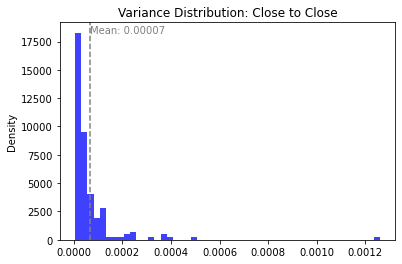

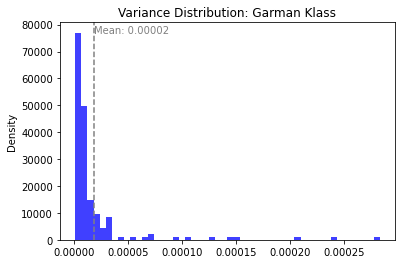

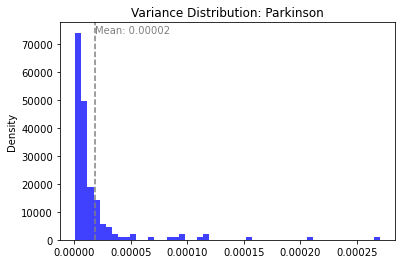

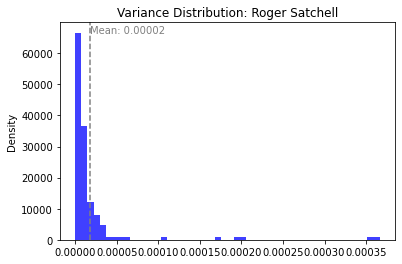

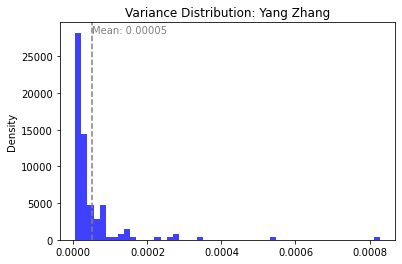

Parkinson: 0.00002
Garman Klass: 0.00002
Roger Satchell: 0.00002
Yang Zhang: 0.00005
Close to Close: 0.00007


In [11]:
import numpy as np
import matplotlib.pyplot as plt

var_means = {}  

for i in range(1, 6):
    x = f'Estimator{i}'
    liste = monthly_var[x].tolist()

    mean_var = np.mean(liste)
    var_means[legends[i-1]] = mean_var  
    density, bins, _ = plt.hist(liste, bins=50, alpha=0.75, color='blue', density=True)
    plt.ylabel('Density')
    plt.axvline(x=mean_var, color='gray', linestyle='--')
    plt.text(mean_var, plt.ylim()[1] * 0.95, f'Mean: {mean_var:.5f}', color='gray', ha='left')
    plt.title(f'Variance Distribution: {legends[i-1]}')
    plt.show()

sorted_means = sorted(var_means.items(), key=lambda item: item[1])
for estimator, variance in sorted_means:
    print(f"{estimator}: {variance:.5f}")
